In [1]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at /media/me/DATA/Dropbox/31_Projekte/01_Python/libs
Start Time: 19:22:48


time: 657 ms


# Analyse scale methods

In [2]:
#!pip install perlin_noise

time: 15.3 ms


In [3]:
import random
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import pandasklar as pak 

time: 1.34 s


In [4]:
# global Settings
pak.set_grid(max_column_width=500)
pak.Config.set('VERBOSE', True)

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions

time: 29.1 ms


## Create many ugly scalings

min = -0.6773307919427132
max = 0.8664700709393718


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


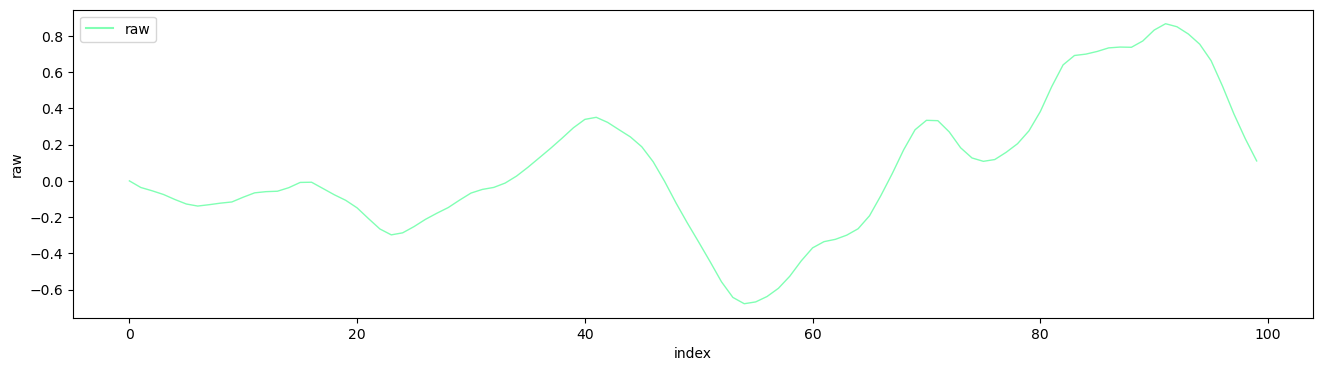

time: 562 ms


In [5]:
# Create raw data with ugly scaling

def create_raw():
    typ = random.choice([ 'a','d','p','f','e'])
    raw = pak.random_series(100, typ, name='raw', index=-1) 
    raw = pak.scale(raw, 'random')    
    df = pak.dataframe(raw, verbose=False)
    return df


# display
df = create_raw()
print(  'min =',df.raw.min() )
print(  'max =',df.raw.max() )
%matplotlib inline
pak.plot(df)

In [6]:
# scale, analyse and log

df_log = pd.DataFrame()

def scale_and_analyse(df, df_log, method='min_max'):
    df['scaled'] = pak.scale(df.raw, method, verbose=True)     
    a = pak.analyse_values(df) #.set_index('col_name')
    spalten = ['col_name','vmin','vmax','vmean','vmedian','vsum','nunique']
    a = a[spalten].iloc[1:] 
    mask = (a.col_name == 'scaled')
    a['col_name'][mask] = method 
    #a = a.apply(bpy.human_readable_number_2)
    log = result = pak.add_rows(df_log, a, verbose=False )
    log = pak.reset_index(log)
    return df, log

time: 30 ms


In [8]:
# Create many ugly scaled series. Scale, analyse and log them with each scaling method.

size = 1000
methods = ['max_abs','min_max','min_max_robust','rel','mean','median','compare_median','rank']
#methods = ['max_abs','min_max','min_max_robust',]
#methods = ['mean']
df_log = pd.DataFrame()
for method in methods:
    for i in range(0,size):
        df = create_raw()
        df, df_log = scale_and_analyse(df, df_log, method)
        if i % 1000 == 0  and  i>0:
            print(method,i)

df_log.head(3)

,col_name,vmin,vmax,vmean,vmedian,vsum,nunique
0,raw,NaN,NaN,NaN,NaN,0.00,0
1,max_abs,0.00,0.00,0.0,0.0,0.00,1
2,raw,16.69,16.71,16.7,16.7,1670.22,100


time: 2min 48s


In [9]:
# Filter and display the log
#mask = df_log.col_name == 'rank'
#pak.grid(df_log,mask)

time: 28.1 ms


In [10]:
# statistics  
pak.group_and_agg( df_log, 
                   col_origins=['col_name', 'vmin', 'vmax','vmean','vmedian','vsum',],
                   col_funcs  =['group',    'mean', 'mean','mean', 'mean',   'mean',],
                   col_names  =['method',   'min',  'max', 'mean', 'median', 'sum', ],                  
             )  

15991 rows less, now 9 rows


,method,min,max,mean,median,sum
0,compare_median,3.515000e-01,2.356230e+00,1.112100e+00,1.007590e+00,1.062787e+02
1,max_abs,-1.186000e-01,4.227400e-01,1.558300e-01,1.572700e-01,1.577612e+01
2,mean,-1.149510e+00,1.244550e+00,1.980000e-03,-1.841000e-02,1.990000e-01
3,median,-1.476240e+00,1.572750e+00,1.788000e-02,0.000000e+00,1.136190e+00
4,min_max,0.000000e+00,6.880000e-01,3.287900e-01,3.202300e-01,3.162279e+01
5,min_max_robust,-3.080000e-03,6.684100e-01,3.214800e-01,3.158600e-01,3.106833e+01
6,rank,7.797368e-02,9.220263e-01,4.991974e-01,4.986184e-01,3.599793e+01
7,raw,1.098683e+11,1.098683e+11,1.098683e+11,1.098683e+11,8.480522e+12
8,rel,-8.387000e-02,7.392000e-02,1.850000e-03,3.560000e-03,1.720000e-01


time: 103 ms


## Assertions

In [11]:
mask0 = df_log.col_name == 'max_abs'
mask1 = df_log.vmin < -1
mask = mask0  &  mask1 
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 48.8 ms


In [12]:
mask0 = df_log.col_name == 'max_abs'
mask1 = df_log.vmax > 1
mask = mask0  &  mask1 
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 132 ms


In [13]:
mask0 = df_log.col_name == 'min_max'
mask1 = df_log.vmin != 0
mask2 = df_log.vmin.notnull()
mask = mask0  &  mask1  &  mask2
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 67.8 ms


In [14]:
mask0 = df_log.col_name == 'min_max'
mask1 = df_log.vmax != 1
mask2 = df_log.vmax != df_log.vmin
mask3 = df_log.vmax.notnull()
mask = mask0  &  mask1  &  mask2  &  mask3
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 74 ms


In [15]:
mask0 = df_log.col_name == 'min_max_robust'
mask1 = df_log.vmin > 0
mask = mask0  &  mask1  
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 92.2 ms


In [16]:
mask0 = df_log.col_name == 'min_max_robust'
mask1 = df_log.vmin < -0.1
mask = mask0  &  mask1
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 76.6 ms


In [17]:
mask0 = df_log.col_name == 'min_max_robust'
mask1 = df_log.vmax < 1
mask2 = df_log.vmax != df_log.vmin
mask3 = df_log.vmax.notnull()
mask = mask0  &  mask1  &  mask2  &  mask3
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 68.5 ms


In [18]:
mask0 = df_log.col_name == 'min_max_robust'
mask1 = df_log.vmax > 1.3
mask = mask0  &  mask1 
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 67.9 ms


In [19]:
if 'min_max_robust' in methods:
    mask = df_log.col_name == 'min_max_robust'
    assert abs(df_log[mask].vmin.mean() - 0) < 0.01

time: 78.8 ms


In [20]:
if 'min_max_robust' in methods:
    mask1 = df_log.col_name == 'min_max_robust'
    mask2 = df_log['nunique'] > 1
    mask = mask1  &  mask2
    assert abs(df_log[mask].vmax.mean() - 1) < 0.01

time: 76.2 ms


In [21]:
mask0 = df_log.col_name == 'rel'
mask1 = (df_log.vsum -  1).abs()  >  0.00000001
mask2 = (df_log.vsum - -1).abs()  >  0.00000001
mask3 = df_log['nunique'] > 1
mask = mask0  &  mask1  &  mask2  &  mask3
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 68.8 ms


In [22]:
mask0 = df_log.col_name == 'mean'
mask1 = (df_log.vmean - 0).abs()  >  0.000001
mask2 = df_log.vmax - df_log.vmin >  0.000001
mask = mask0  &  mask1  &  mask2
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 101 ms


In [23]:
mask0 = df_log.col_name == 'median'
mask1 = (df_log.vmedian - 0).abs()  >  0.00000001
mask = mask0  &  mask1 
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 142 ms


In [24]:
mask0 = df_log.col_name == 'compare_median'
mask1 = df_log.vmin !=  0
mask2 = df_log['nunique'] > 1
mask = mask0  &  mask1  &  mask2
pak.check_mask( df_log, mask, 0, 0)
#df_log[mask]

 0 rows
time: 57.7 ms


In [25]:
if 'rank' in methods:
    mask = df_log.col_name == 'rank'
    assert abs(df_log[mask].vmedian.mean() - 0.5) < 0.01

time: 66 ms


In [26]:
raise Stop

Stop Time:  19:35:23
Elapsed:    12 mins, 34 secs


time: 73.7 ms


In [ ]:
s = pak.random_series_errorprone( 7, values=0 )
s

In [ ]:
pak.scale(s, 'compare_median', verbose=True)  

In [ ]:
s

In [ ]:
pak.analyse_values(s)

In [ ]:
s.shape[0]